Imports

In [21]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2

Visualize images in the dataset

In [16]:
# Download the dataset from Kaggle
dataset_dir = kagglehub.dataset_download("boukraailyesali/traffic-road-object-detection-dataset-using-yolo")
print(f"Dataset downloaded to: {dataset_dir}")

# Specify the directory containing train and val images
train_dir = os.path.join(dataset_dir, "train/images")
label_dir_train = os.path.join(dataset_dir, "train/labels")
val_dir = os.path.join(dataset_dir, "val/images")
label_dir_val = os.path.join(dataset_dir, "val/labels")

# Get a list of all image files in the train directory
image_files = [f for f in os.listdir(train_dir) if f.endswith((".jpg", ".jpeg"))]

Dataset downloaded to: /home/bilus/.cache/kagglehub/datasets/boukraailyesali/traffic-road-object-detection-dataset-using-yolo/versions/1


Visualize only one image

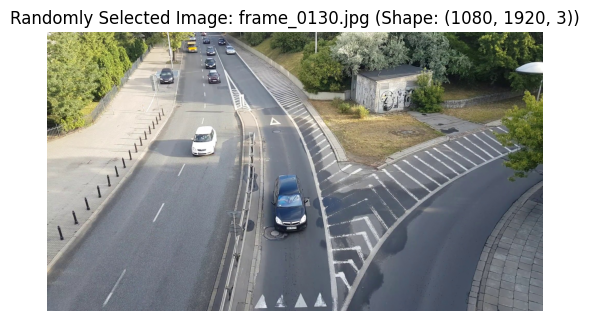

In [18]:
# Randomly select one image file
random_image = random.choice(image_files)

# Load and display the selected image
image_path = os.path.join(train_dir, random_image)
image = cv2.imread(image_path)
image_shape = image.shape
if image is not None:
  # OpenCV reads images in BGR format, so convert to RGB for Matplotlib
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(f"Randomly Selected Image: {random_image} (Shape: {image_shape})")
  plt.axis('off')
  plt.show()
else:
  print(f"Failed to load image: {random_image}")

Visualize three random images

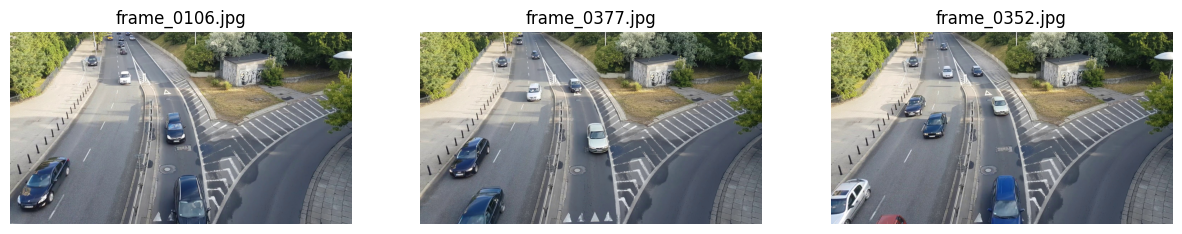

In [19]:
# Randomly select 3 images to display
random_images = random.sample(image_files, 3)

# Create a subplot with 1 row and 3 columns
plt.figure(figsize=(15, 5))
for i, image_file in enumerate(random_images):
  image_path = os.path.join(train_dir, image_file)
  image = cv2.imread(image_path)  # Read the image using OpenCV

  if image is not None:
    plt.subplot(1, 3, i + 1)
    # OpenCV reads images in BGR format, so convert to RGB for Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
    plt.title(image_file)
    plt.axis('off')

plt.show()

Open classes file

In [26]:
class_file_path =  os.path.join(dataset_dir, "classes.txt")
#"/kaggle/input/traffic-road-object-detection-dataset-using-yolo/version/1/classes.txt"

print(class_file_path)

with open(class_file_path, 'r') as file:
  classes = file.read().splitlines()

if len(classes) > 0:
  print("Classes in the dataset:")
  for class_label in classes:
    print(class_label)
else:
  print("No classes found in the classes.txt file.")


/home/bilus/.cache/kagglehub/datasets/boukraailyesali/traffic-road-object-detection-dataset-using-yolo/versions/1/classes.txt
Classes in the dataset:
car


How labels looks like

In [31]:
label_file_path = os.path.join(dataset_dir, "train/labels", random_image.replace('.jpg', '.txt'))

# Read the label file into a pandas DataFrame
column_names = ['class', 'x_min', 'y_min', 'x_max', 'y_max']
df = pd.read_csv(label_file_path, sep=' ', header=None, names=column_names)
df

,class,x_min,y_min,x_max,y_max
0,0,0.487240,0.600926,0.063021,0.201852
1,0,0.240365,0.139352,0.036979,0.067593
2,0,0.318490,0.384259,0.048438,0.129630
3,0,0.335938,0.157407,0.029167,0.050000
4,0,0.365625,0.051852,0.021875,0.029630
5,0,0.328646,0.104630,0.019792,0.038889
6,0,0.330990,0.061574,0.023438,0.032407


Count number of images and percentage between train and val

In [32]:
# Count number of images in each directory
num_train_images = len([f for f in os.listdir(train_dir) if f.endswith((".jpg", ".jpeg"))])
num_val_images = len([f for f in os.listdir(val_dir) if f.endswith((".jpg", ".jpeg"))])

# Calculate the number of images
total_images = num_train_images + num_val_images

# Calculate the percentage of images in each directory
percentage_train = (num_train_images / total_images) * 100
percentage_val = (num_val_images / total_images) * 100

print(f"Total number of images: {total_images}")
print(f"Number of training images: {num_train_images} ({percentage_train:.2f}%)")
print(f"Number of validation images: {num_val_images} ({percentage_val:.2f}%)")

Total number of images: 499
Number of training images: 399 (79.96%)
Number of validation images: 100 (20.04%)


Visualize one image with bounding boxes

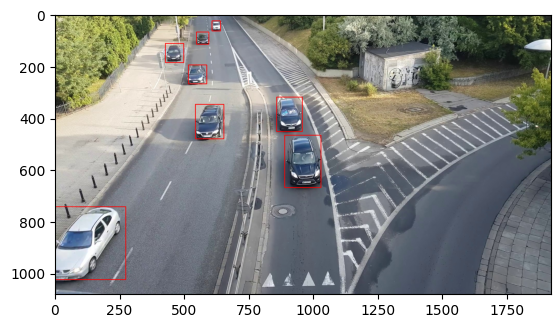

In [33]:
# Randomly selected image to display
random_image = random.choice(image_files)

# Load the selected image
image_path = os.path.join(train_dir, random_image)
image = cv2.imread(image_path) # Read the image using OpenCV

# Load the corresponding label file
label_file_path = os.path.join(label_dir_train, random_image.replace('.jpg', '.txt'))

# Image shape
image_height, image_width, _ = image.shape

# Read YOLO labels from the label file
with open(label_file_path, 'r') as file:
  yolo_labels = file.readlines()
  
# Convert relative coordinates to absolute coordinates and draw rectangles
for label in yolo_labels:
  class_id, x_center, y_center, width, height = map(float, label.split())
  
  # Convert relative coordinates to absolute coordinates
  x_center *= image_width
  y_center *= image_height
  width *= image_width
  height *= image_height

  # Calculate top-left and bottom-right coordinates
  x1 = int(x_center - width / 2)
  y1 = int(y_center - height / 2)
  x2 = int(x_center + width / 2)
  y2 = int(y_center + height / 2)

  color = (0, 0, 255)
  thikness = 2
  # Draw rectangle on the image
  cv2.rectangle(image, (x1, y1), (x2, y2), color, thikness)

# Display the image with rectangles
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Visualize 3 images with the corresponding bounding box

In [35]:
# Function to draw bounding boxes on an image
def convert_coordinates(x_center, y_center, width, height, image_width, image_height):
  x_center *= image_width
  y_center *= image_height
  width *= image_width
  height *= image_height

  x1 = int(x_center - width / 2)
  y1 = int(y_center - height / 2)
  x2 = int(x_center + width / 2)
  y2 = int(y_center + height / 2)

  return x1, y1, x2, y2

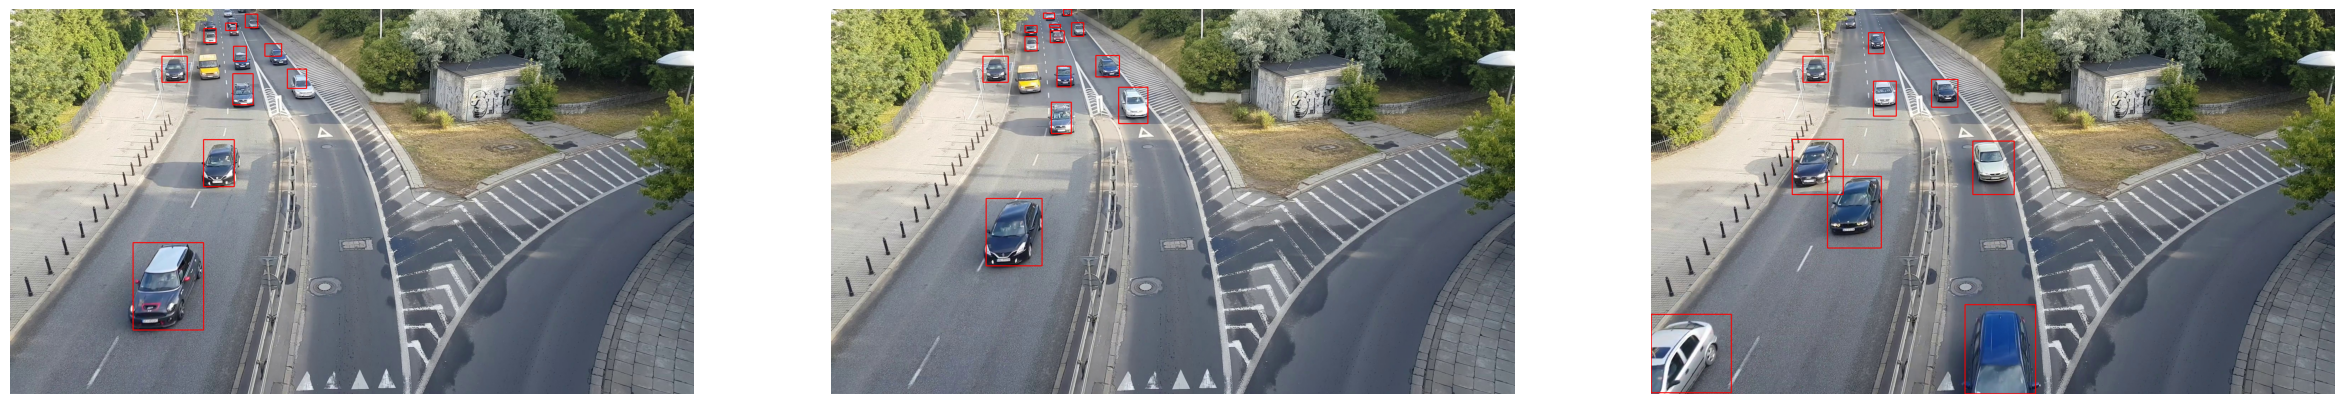

In [36]:
# Number of images to display
num_images = 3

# Create subplots
fig, axes = plt.subplots(1, num_images, figsize=(30, 30))

for i in range(num_images):
    # Randomly select one image to display
    random_image = random.choice(image_files)

    # Load the selected image
    image_path = os.path.join(train_dir, random_image)
    image = cv2.imread(image_path)  # Read the image using OpenCV

    # Load the corresponding label file
    label_file_path = os.path.join(label_dir_train, random_image.replace('.jpg', '.txt'))

    # Image shape
    image_height, image_width, _ = image.shape

    # Read YOLO labels from the label file
    with open(label_file_path, 'r') as file:
        yolo_labels = file.readlines()

    # Convert relative coordinates to absolute coordinates and draw rectangles
    for label in yolo_labels:
        class_id, x_center, y_center, width, height = map(float, label.split())

        x1, y1, x2, y2 = convert_coordinates(x_center, y_center, width, height, image_width, image_height)

        color = (0, 0, 255)
        thickness = 2
        # Draw rectangle on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Display the image with rectangles in the subplot
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')  # Turn off axis labels

plt.show()